In [71]:
import pandas as pd
import yfinance as yf


In [72]:
def fetch_multiple_data(tickers: list[str]):
    data = yf.download(tickers, start="2023-01-01", auto_adjust=False)
    
    if data is not None:
        return data['Adj Close']
    
    return

In [73]:
TICKERS = ['PYPL', 'BMNR', 'FISV', 'VG', 'TTD', 'PRCT', 'FIG', 'DUOL', 'NVO', 'CAVA', 'LULU', 'MNDY', 'HIMS', 'NKE', 'ADBE', 'RKLB', 'ASTS', 'JMIA', 'VKTX', 'IONQ', 'ONDS', 'OKLO', 'TSLA', 'AMD', 'MELI', 'EOSE', 'IREN', 'GOOGL', 'HOOD', 'META', 'SOFI', 'CIFR', 'SNOW', 'TMDX', 'AEHR', 'ZS', 'AMZN', 'MDB', 'CLPT', 'PL', 'RR', 'ARM', 'APP', 'ISRG', 'CCJ', 'NVDA', 'CFLT', 'NET', 'GLBE', 'CRWD', 'DDOG', 'AXON', 'COIN', 'PLTR', 'UNH', 'MSFT', 'AAPL', 'WULF']
data = fetch_multiple_data(TICKERS)
data = data.dropna(axis=1)
data.head()

[*********************100%***********************]  58 of 58 completed


Ticker,AAPL,ADBE,AEHR,AMD,AMZN,APP,ASTS,AXON,CCJ,CFLT,...,RKLB,SNOW,SOFI,TMDX,TSLA,TTD,UNH,VKTX,WULF,ZS
Date,,,,,,,,,,,,,,,,,,,,,
2023-01-03,123.211212,336.920013,18.389999,64.019997,85.820000,10.73,4.46,168.240005,22.806438,21.330000,...,3.87,135.500000,4.50,57.110001,108.099998,44.020000,490.979858,8.52,0.71,110.190002
2023-01-04,124.482040,341.410004,17.910000,64.660004,85.139999,10.90,4.60,168.759995,22.388882,20.500000,...,4.04,130.440002,4.77,54.049999,113.639999,44.310001,477.593964,8.42,0.81,111.589996
2023-01-05,123.161957,328.440002,17.270000,62.330002,83.120003,9.85,4.54,165.740005,22.726902,17.924999,...,4.17,121.559998,4.63,54.630001,110.339996,42.590000,463.829407,8.08,0.73,104.389999
2023-01-06,127.693596,332.750000,22.809999,63.959999,86.080002,9.72,4.75,170.899994,24.297705,18.190001,...,4.23,124.059998,4.62,55.630001,113.059998,42.290001,463.867279,8.44,0.68,103.959999
2023-01-09,128.215729,341.980011,26.450001,67.239998,87.360001,10.18,4.78,177.449997,24.745085,19.379999,...,4.22,134.429993,4.82,53.630001,119.769997,43.990002,463.924103,8.42,0.70,104.750000


In [74]:
import numpy as np

def sanitize_data(df):
    start_date = df.index.min()
    end_date = df.index.max()
    
    date_range = pd.date_range(start=start_date, end=end_date, freq='D')
    
    df_sanitized = df.reindex(date_range)
    df_sanitized.replace([np.inf, -np.inf], np.nan, inplace=True)
    df_sanitized.interpolate(method='linear', inplace=True)
    
    df_sanitized.fillna(method='ffill', inplace=True)
    df_sanitized.fillna(method='bfill', inplace=True)
    
    assert not df_sanitized.isna().any().any()
    assert not np.isinf(df_sanitized).any().any()
    
    return df_sanitized

uts_sanitized = sanitize_data(data)

print(f"Original shape: {data.shape}")
print(f"Sanitized shape: {uts_sanitized.shape}")
uts_sanitized.head()

Original shape: (758, 51)
Sanitized shape: (1103, 51)


C:\Users\Theephop\AppData\Local\Temp\ipykernel_3808\893108468.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_sanitized.fillna(method='ffill', inplace=True)
C:\Users\Theephop\AppData\Local\Temp\ipykernel_3808\893108468.py:14: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_sanitized.fillna(method='bfill', inplace=True)


Ticker,AAPL,ADBE,AEHR,AMD,AMZN,APP,ASTS,AXON,CCJ,CFLT,...,RKLB,SNOW,SOFI,TMDX,TSLA,TTD,UNH,VKTX,WULF,ZS
2023-01-03,123.211212,336.920013,18.389999,64.019997,85.820000,10.730000,4.46,168.240005,22.806438,21.330000,...,3.870000,135.500000,4.500000,57.110001,108.099998,44.020000,490.979858,8.520000,0.710000,110.190002
2023-01-04,124.482040,341.410004,17.910000,64.660004,85.139999,10.900000,4.60,168.759995,22.388882,20.500000,...,4.040000,130.440002,4.770000,54.049999,113.639999,44.310001,477.593964,8.420000,0.810000,111.589996
2023-01-05,123.161957,328.440002,17.270000,62.330002,83.120003,9.850000,4.54,165.740005,22.726902,17.924999,...,4.170000,121.559998,4.630000,54.630001,110.339996,42.590000,463.829407,8.080000,0.730000,104.389999
2023-01-06,127.693596,332.750000,22.809999,63.959999,86.080002,9.720000,4.75,170.899994,24.297705,18.190001,...,4.230000,124.059998,4.620000,55.630001,113.059998,42.290001,463.867279,8.440000,0.680000,103.959999
2023-01-07,127.867640,335.826670,24.023333,65.053332,86.506668,9.873334,4.76,173.083328,24.446831,18.586667,...,4.226667,127.516663,4.686667,54.963334,115.296664,42.856668,463.886220,8.433333,0.686667,104.223333


In [75]:
from statsmodels.tsa.stattools import coint
from itertools import combinations
import numpy as np

def find_cointegrated_pairs(data, p_value_threshold=0.2):
    """
    Find cointegrated pairs of stocks based on the Augmented Dickey-Fuller (ADF) test.
    Parameters:
    - data (pd.DataFrame): DataFrame where columns are tickers and rows are time series data.
    - p_value_threshold (float): The significance level for cointegration testing.
    Returns:
    - pvalue_matrix (numpy.ndarray): A matrix of cointegration p-values between stock pairs.
    - pairs (list): A list of tuples representing cointegrated stock pairs and their p-values.
    """
    n = data.shape[1]
    pvalue_matrix = np.ones((n, n))
    keys = data.keys()
    pairs = []
    
    for i, j in combinations(range(n), 2):
        s1 = data.iloc[:, i]
        s2 = data.iloc[:, j]
        result = coint(s1, s2)
        pvalue = result[1]
        pvalue_matrix[i, j] = pvalue
        if pvalue < p_value_threshold:
            pairs.append((keys[i], keys[j], pvalue))
            
    return pvalue_matrix, pairs

P_VALUE_THRESHOLD = 0.02
pvalues, pairs = find_cointegrated_pairs(
    uts_sanitized, p_value_threshold=P_VALUE_THRESHOLD)

print(f"Found {len(pairs)} cointegrated pairs at {P_VALUE_THRESHOLD} significance level.")
for p in pairs:
    print(p)

Found 19 cointegrated pairs at 0.02 significance level.
('APP', 'ASTS', np.float64(0.011829386003199919))
('ASTS', 'RKLB', np.float64(0.015723196207083047))
('AXON', 'HIMS', np.float64(0.005312712417844423))
('CLPT', 'ISRG', np.float64(0.002126563045502422))
('CLPT', 'META', np.float64(0.017437769613984445))
('CLPT', 'NET', np.float64(0.01425618721185899))
('CLPT', 'NVDA', np.float64(0.009688437248513685))
('CLPT', 'PLTR', np.float64(0.009297938570209083))
('CLPT', 'SOFI', np.float64(0.007765276493318968))
('CLPT', 'TSLA', np.float64(0.004349087330364049))
('COIN', 'META', np.float64(0.0032905398837570804))
('IONQ', 'NET', np.float64(0.006716221336471893))
('IONQ', 'PLTR', np.float64(0.009151552626298179))
('IONQ', 'SOFI', np.float64(0.016143253069641594))
('IREN', 'WULF', np.float64(0.017356157907217853))
('NET', 'PLTR', np.float64(0.0196600546076548))
('OKLO', 'SOFI', np.float64(0.0003137005152064838))
('ONDS', 'PL', np.float64(0.0005992932420823164))
('RKLB', 'SOFI', np.float64(0.00

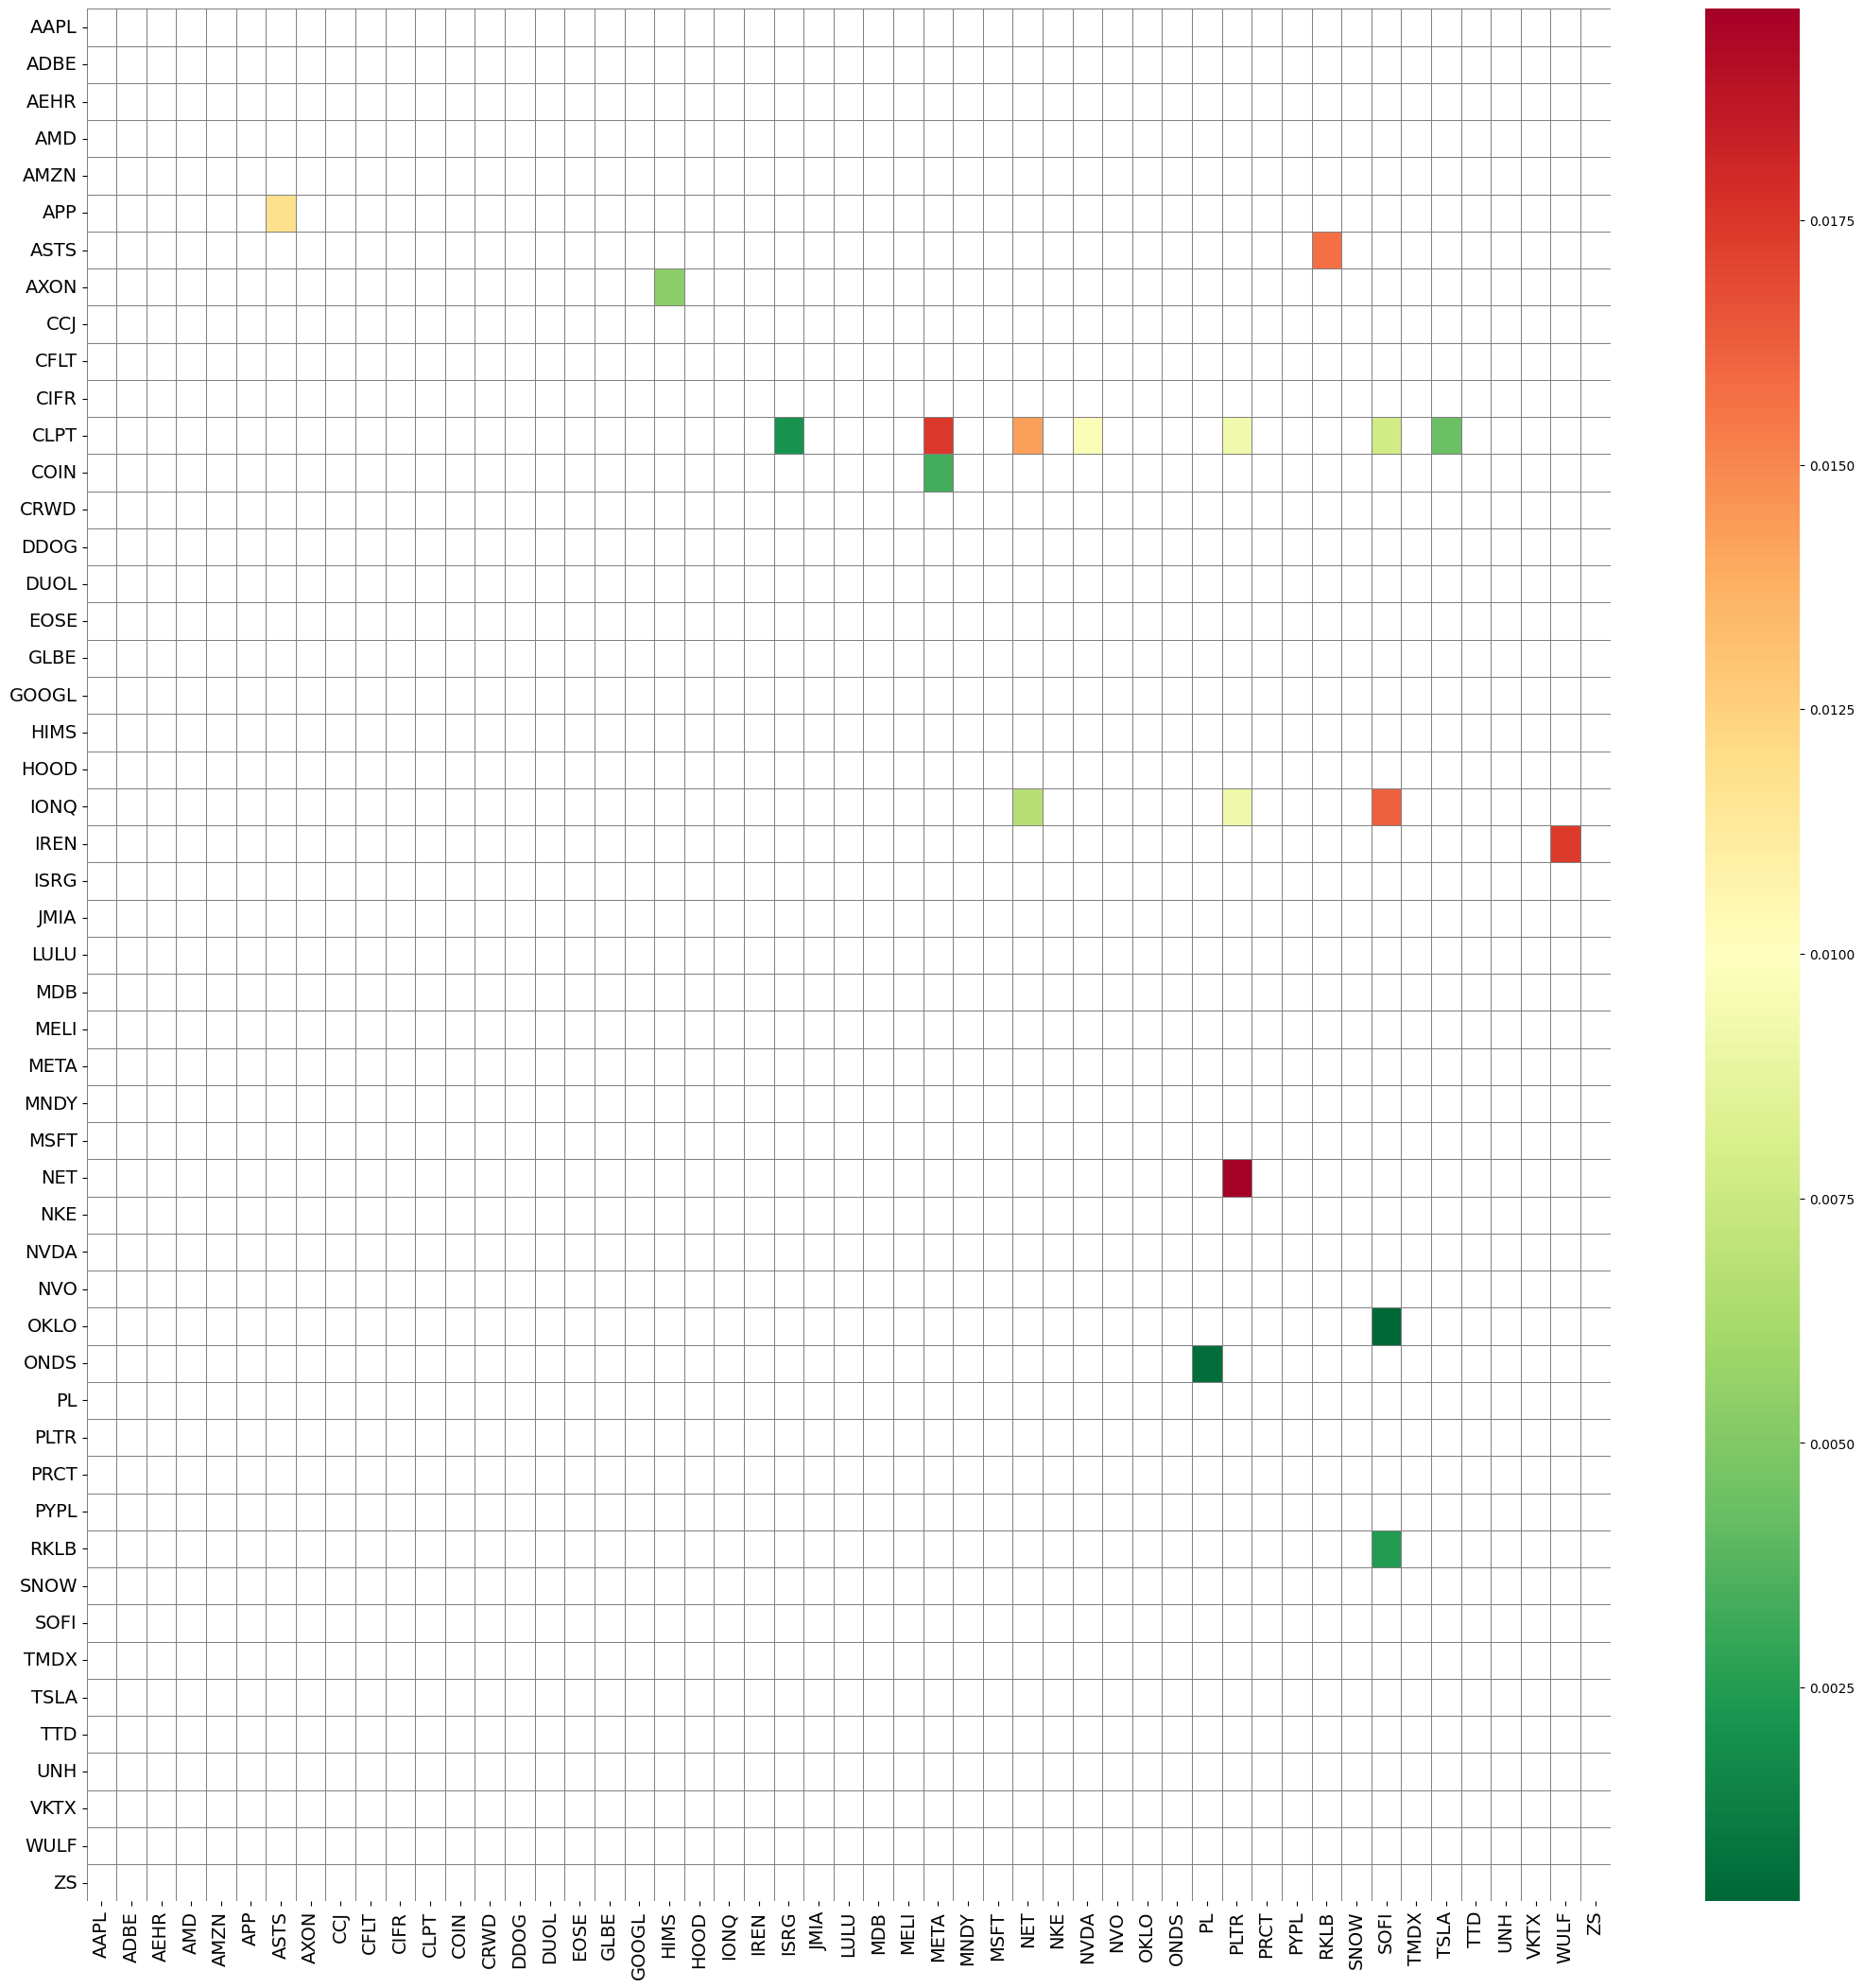

In [76]:
import seaborn as sns
from matplotlib import pyplot as plt

plt.figure(figsize=(26, 26))
heatmap = sns.heatmap(pvalues, xticklabels=uts_sanitized.keys(),
                      yticklabels=uts_sanitized.keys(), cmap='RdYlGn_r',
                      mask=(pvalues > (P_VALUE_THRESHOLD)),
                      linecolor='gray', linewidths=0.5)
heatmap.set_xticklabels(heatmap.get_xticklabels(), size=14)
heatmap.set_yticklabels(heatmap.get_yticklabels(), size=14)
plt.show()

In [77]:
sorted_pairs = sorted(pairs, key=lambda x: x[2], reverse=False)
sorted_pairs = sorted_pairs[0:35]
sorted_pairs_labels, pairs_p_values = zip(
    *[(f'{y1} <-> {y2}', p*1000) for y1, y2, p in sorted_pairs])


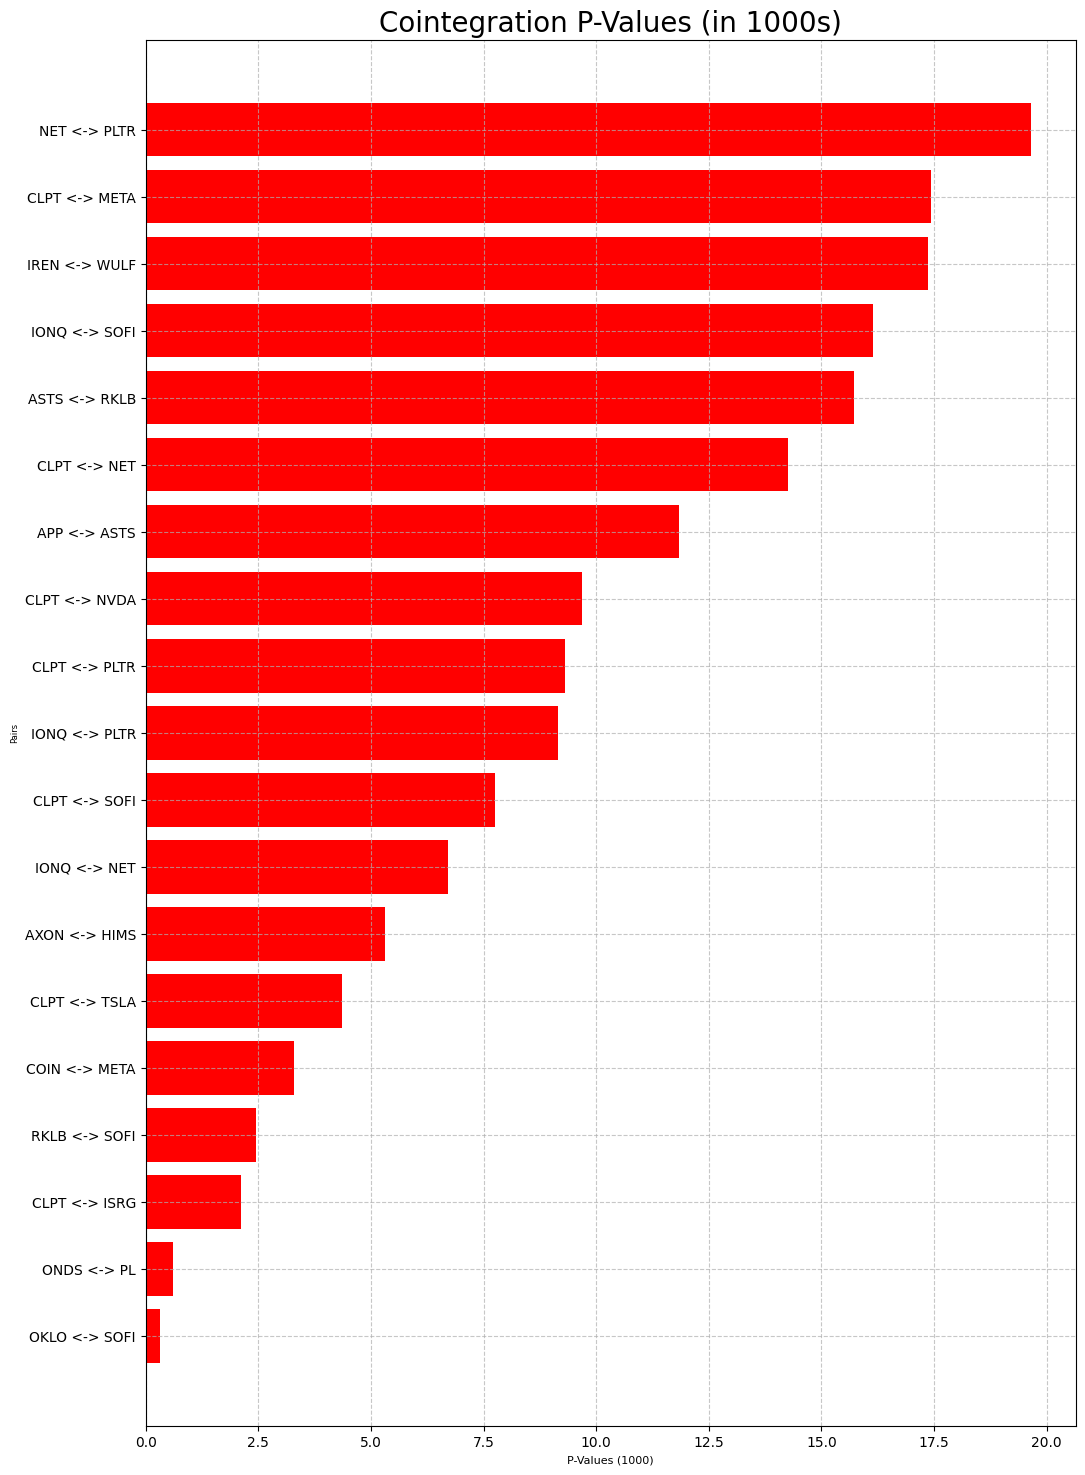

In [78]:
plt.figure(figsize=(12, 18))
plt.barh(sorted_pairs_labels,
         pairs_p_values, color='red')
plt.xlabel('P-Values (1000)', fontsize=8)
plt.ylabel('Pairs', fontsize=6)
plt.title('Cointegration P-Values (in 1000s)', fontsize=20)
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.show()

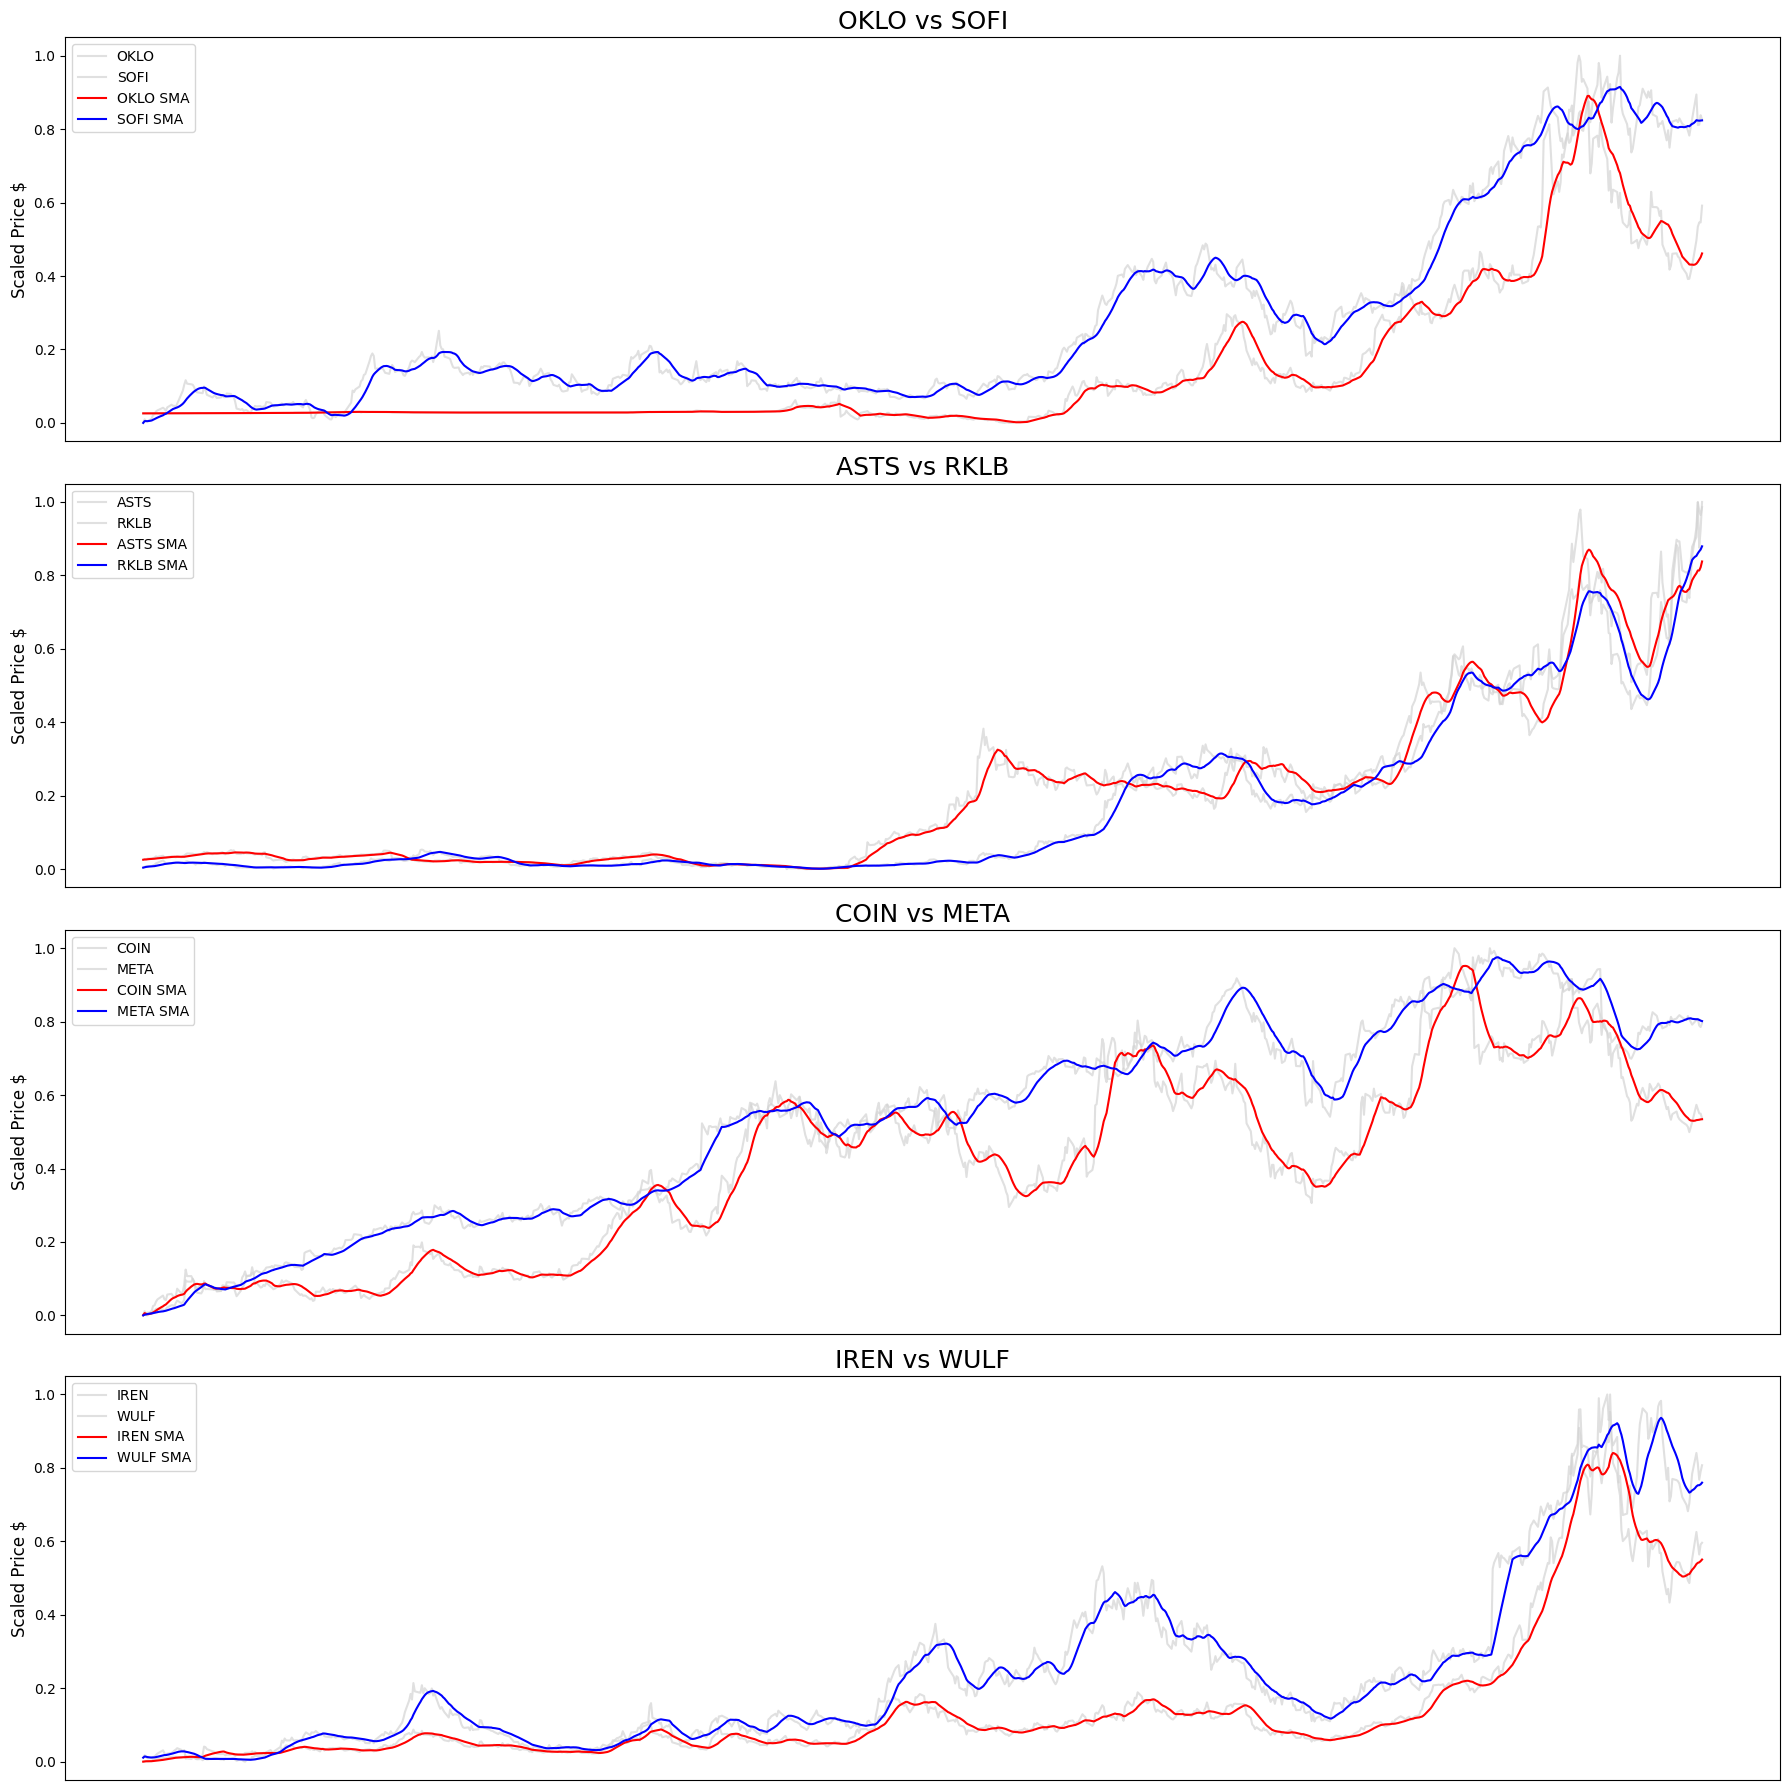

In [79]:
from sklearn.preprocessing import MinMaxScaler

ticker_pairs = [('OKLO', 'SOFI'), ('ASTS', 'RKLB'), ('COIN', 'META'), ('IREN', 'WULF')]
fig, axs = plt.subplots(4, 1, figsize=(18, 18))
scaler = MinMaxScaler()
for i, (ticker1, ticker2) in enumerate(ticker_pairs):
    # Scale the price data for each pair using MIN MAX
    scaled_data1 = scaler.fit_transform(
        uts_sanitized[ticker1].values.reshape(-1, 1))
    scaled_data2 = scaler.fit_transform(
        uts_sanitized[ticker2].values.reshape(-1, 1))
    axs[i].plot(scaled_data1, label=f'{ticker1}', color='lightgray', alpha=0.7)
    axs[i].plot(scaled_data2, label=f'{ticker2}', color='lightgray', alpha=0.7)
    # Apply rolling mean with a window of 15
    scaled_data1_smooth = pd.Series(scaled_data1.flatten()).rolling(
        window=15, min_periods=1).mean()
    scaled_data2_smooth = pd.Series(scaled_data2.flatten()).rolling(
        window=15, min_periods=1).mean()
    axs[i].plot(scaled_data1_smooth, label=f'{ticker1} SMA', color='red')
    axs[i].plot(scaled_data2_smooth, label=f'{ticker2} SMA', color='blue')
    axs[i].set_ylabel('Scaled Price $', fontsize=12)
    axs[i].set_title(f'{ticker1} vs {ticker2}', fontsize=18)
    axs[i].legend()
    axs[i].set_xticks([])
plt.tight_layout()
plt.show()

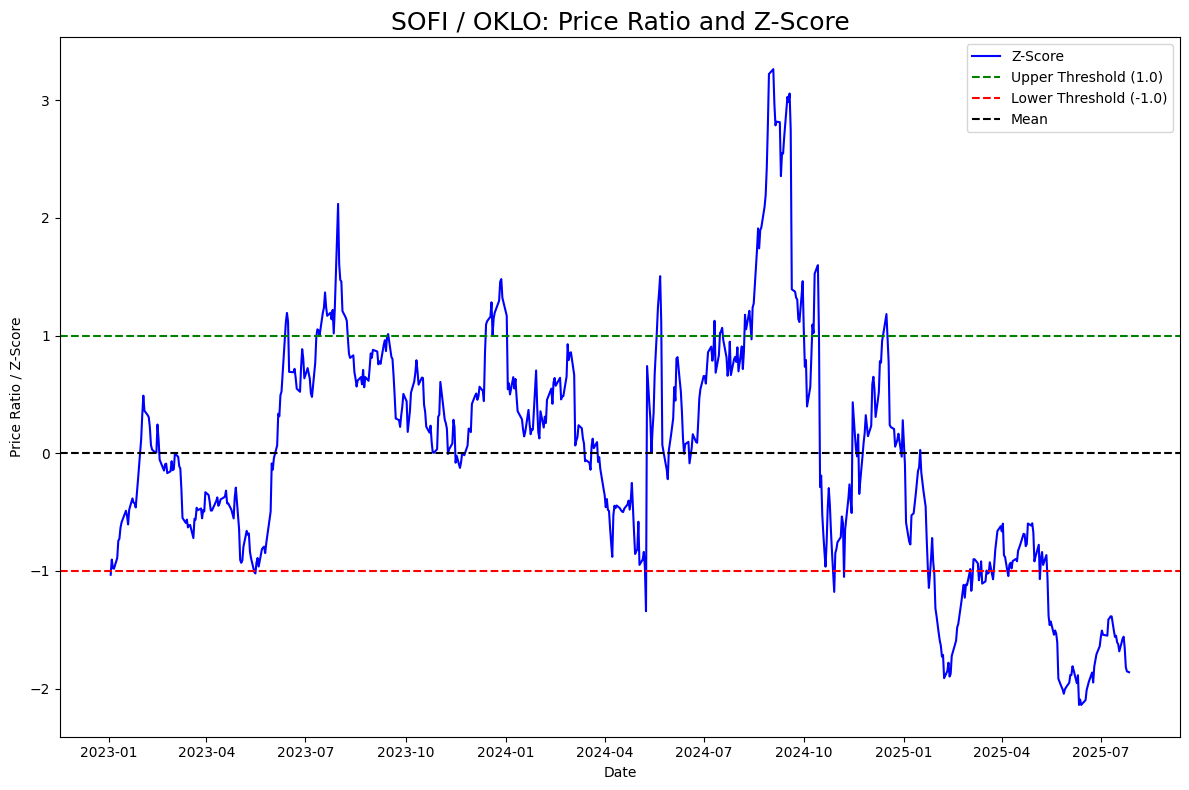

In [80]:
def plot_price_ratio_zscore(uts_sanitized, ticker1: str, ticker2: str):
    TRAIN = int(len(uts_sanitized[ticker1]) * 0.85)
    TEST = len(uts_sanitized[ticker1]) - TRAIN

    ticker1_ts = uts_sanitized[ticker1][:TRAIN]
    ticker2_ts = uts_sanitized[ticker2][:TRAIN]
    # Calculate price ratio
    ratios = ticker2_ts/ticker1_ts
    fig, ax = plt.subplots(figsize=(12, 8))
    ratios_mean = np.mean(ratios)
    ratios_std = np.std(ratios)
    ratios_zscore = (ratios - ratios_mean) / ratios_std
    ax.plot(ratios.index, ratios_zscore, label="Z-Score", color='blue')
    # Plot reference lines
    ax.axhline(1.0, color="green", linestyle='--', label="Upper Threshold (1.0)")
    ax.axhline(-1.0, color="red", linestyle='--', label="Lower Threshold (-1.0)")
    ax.axhline(0, color="black", linestyle='--', label="Mean")
    ax.set_title(f'{ticker2} / {ticker1}: Price Ratio and Z-Score', fontsize=18)
    ax.set_xlabel('Date')
    ax.set_ylabel('Price Ratio / Z-Score')
    ax.legend()
    plt.tight_layout()
    plt.show()

plot_price_ratio_zscore(uts_sanitized, 'OKLO', 'SOFI')

In [81]:
def calculate_profit(signals, TICKER):
    profit_df = pd.DataFrame(index=TICKER.index)
    profit_df['price'] = TICKER
    profit_df['signal'] = signals['signal']
    
    # Calculate daily returns of the asset
    profit_df['daily_return'] = profit_df['price'].pct_change()
    
    # Strategy returns: multiply daily returns by the position held (lagged by 1 day)
    # We shift signal by 1 because the return of day T is realized by the position held at start of day T 
    # (determined by signal at T-1)
    profit_df['strategy_return'] = profit_df['daily_return'] * profit_df['signal'].shift(1)
    
    # Calculate cumulative profit (Compounded)
    profit_df['cumulative_profit'] = (1 + profit_df['strategy_return'].fillna(0)).cumprod()
    
    return profit_df

def plot_strategy(price_data, signals, profit, ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(14, 8))
        
    ax.plot(price_data.index, price_data, label="Price", color='gray', alpha=0.5)
    
    # Identify Buy and Sell points
    # signal diff: 1 (Buy), -1 (Sell), 0 (Hold/No Change)
    # orders column tracks these changes
    buys = price_data.loc[signals['orders'] == 1]
    sells = price_data.loc[signals['orders'] == -1]
    
    ax.scatter(buys.index, buys, marker='^', color='green', s=100, label='Buy', zorder=5)
    ax.scatter(sells.index, sells, marker='v', color='red', s=100, label='Sell', zorder=5)
    
    # Plot Cumulative Profit on Secondary Axis
    ax2 = ax.twinx()
    ax2.plot(profit.index, profit['cumulative_profit'], color='purple', linestyle='--', alpha=0.6, label='Cumulative Profit')
    ax2.set_ylabel('Cumulative Return')
    
    ax.set_ylabel('Price')
    
    lines, labels = ax.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax.legend(lines + lines2, labels + labels2, loc='upper left')
    
    return ax, ax2

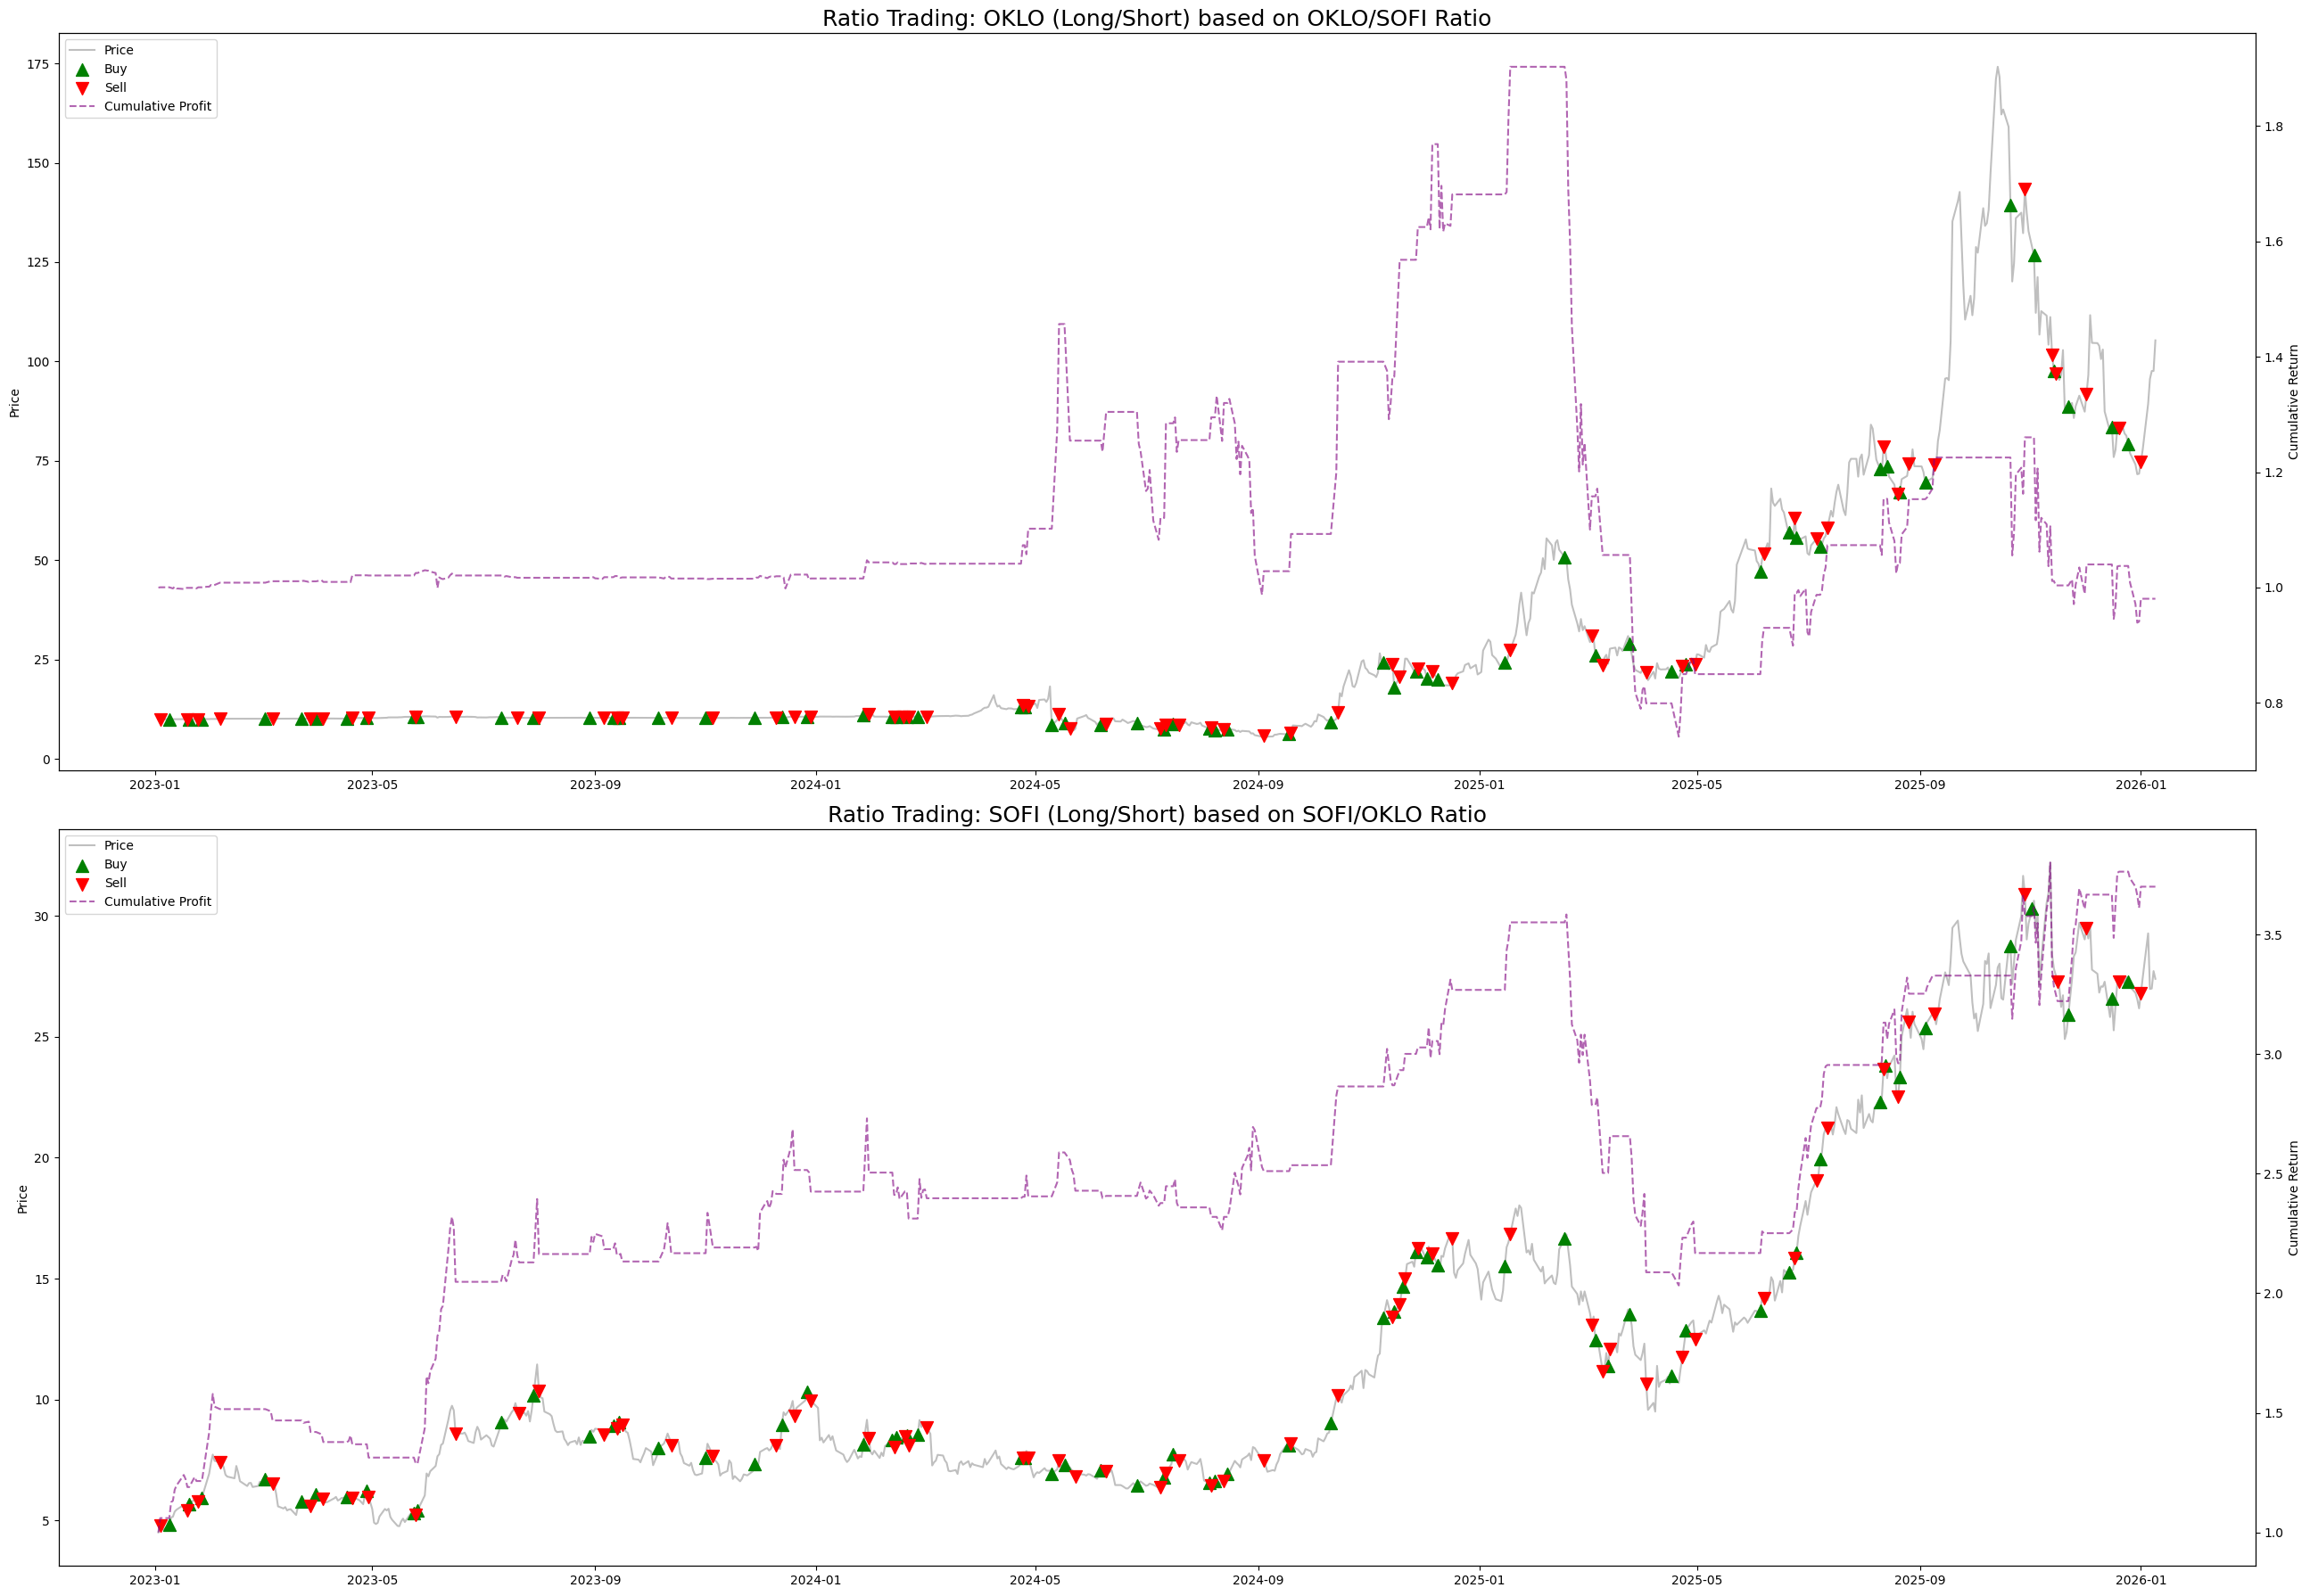

In [82]:
def signals_zscore_evolution(ticker1_ts, ticker2_ts, window_size=15, first_ticker=True):
    """
    Generate trading signals based on z-score analysis of the ratio between two time series.
    Parameters:
    - ticker1_ts (pandas.Series): Time series data for the first security.
    - ticker2_ts (pandas.Series): Time series data for the second security.
    - window_size (int): The window size for calculating z-scores and ratios' statistics.
    - first_ticker (bool): Set to True to use the first ticker as the primary signal source, and False to use the second.Returns:
    - signals_df (pandas.DataFrame): A DataFrame with 'signal' and 'orders' columns containing buy (1) and sell (-1) signals.
    """
    ratios = ticker1_ts / ticker2_ts
    ratios_mean = ratios.rolling(
        window=window_size, min_periods=1, center=False).mean()
    ratios_std = ratios.rolling(
        window=window_size, min_periods=1, center=False).std()
    z_scores = (ratios - ratios_mean) / ratios_std
    buy = ratios.copy()
    sell = ratios.copy()
    if first_ticker:
        # These are empty zones, where there should be no signal
        # the rest is signalled by the ratio.
        buy[z_scores > -1] = 0
        sell[z_scores < 1] = 0
    else:
        buy[z_scores < 1] = 0
        sell[z_scores > -1] = 0
    signals_df = pd.DataFrame(index=ticker1_ts.index)
    signals_df['signal'] = np.where(buy > 0, 1, np.where(sell < 0, -1, 0))
    signals_df['orders'] = signals_df['signal'].diff()
    signals_df.loc[signals_df['orders'] == 0, 'orders'] = None
    return signals_df

TICKER1_ts = uts_sanitized["OKLO"]
TICKER2_ts = uts_sanitized["SOFI"]

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(26, 18))

# Strategy 1: TICKER1 paired with TICKER2
signals_df1 = signals_zscore_evolution(TICKER1_ts, TICKER2_ts)
profit_df1 = calculate_profit(signals_df1, TICKER1_ts)
plot_strategy(TICKER1_ts, signals_df1, profit_df1, ax=ax1)
ax1.set_title(f'Ratio Trading: {TICKER1_ts.name} (Long/Short) based on {TICKER1_ts.name}/{TICKER2_ts.name} Ratio', fontsize=18)

# Strategy 2: TICKER2 paired with TICKER1 (Inverse)
signals_df2 = signals_zscore_evolution(TICKER2_ts, TICKER1_ts, first_ticker=False)
profit_df2 = calculate_profit(signals_df2, TICKER2_ts)
plot_strategy(TICKER2_ts, signals_df2, profit_df2, ax=ax2)
ax2.set_title(f'Ratio Trading: {TICKER2_ts.name} (Long/Short) based on {TICKER2_ts.name}/{TICKER1_ts.name} Ratio', fontsize=18)

plt.tight_layout()
plt.show()

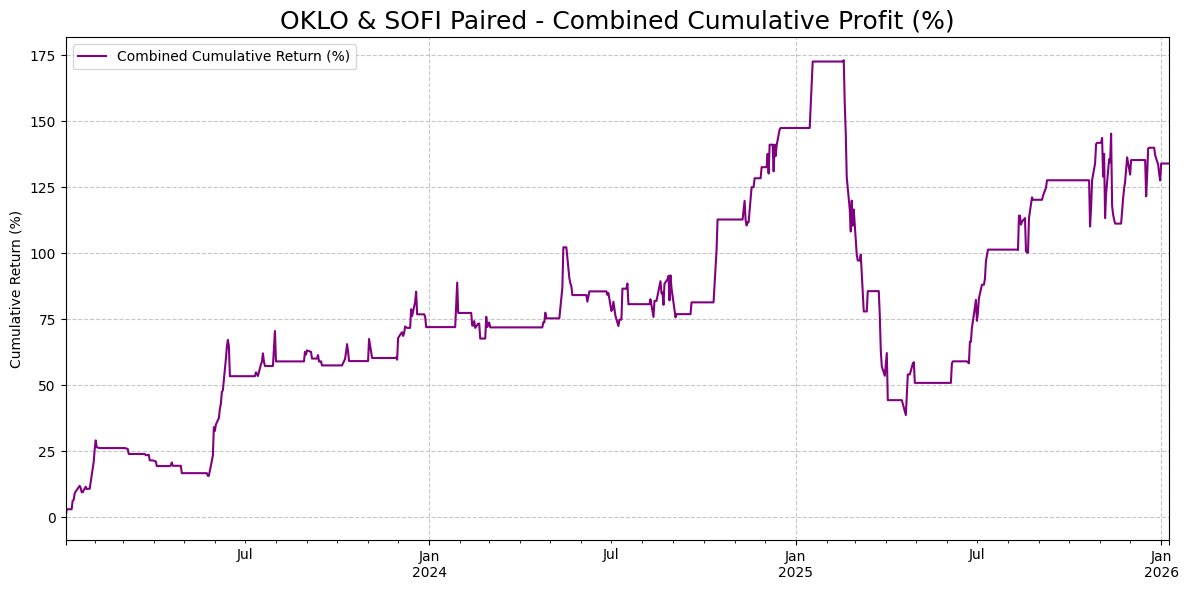

In [83]:
# Sum from trading both pairs
plt.figure(figsize=(12, 6))
combined_wealth = profit_df1['cumulative_profit'] + profit_df2['cumulative_profit']

initial_wealth = combined_wealth.iloc[0]
combined_return_pct = ((combined_wealth - initial_wealth) / initial_wealth) * 100

combined_return_pct.plot(label='Combined Cumulative Return (%)', color='purple')

plt.legend(loc='upper left', fontsize=10)
plt.title(f'{TICKER1_ts.name} & {TICKER2_ts.name} Paired - Combined Cumulative Profit (%)', fontsize=18)
plt.ylabel('Cumulative Return (%)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()